Build a simple linear regression model using RMSprop + SGD optimizer to help 33/11KV substation electric utility to trade power effectively in an day ahead energy market by estimating load at a particular hour based on the load at one hour and one day before. Dataset : Active power load dataset.

**Importing Libraries**

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy import stats

In [39]:
data=pd.read_excel("/Load_Data_in_kW.xlsx",header=None)
data.head()

,0
0,5551.82208
1,4983.17184
2,4888.39680
3,5072.95872
4,5196.25980


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2184 entries, 0 to 2183
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2184 non-null   float64
dtypes: float64(1)
memory usage: 17.2 KB



**Outliers:**

In [41]:
z=np.abs(stats.zscore(data))
print(z)

[[0.04910416]
 [0.08229029]
 [0.08782131]
 ...
 [0.09743692]
 [0.07253822]
 [0.03181432]]


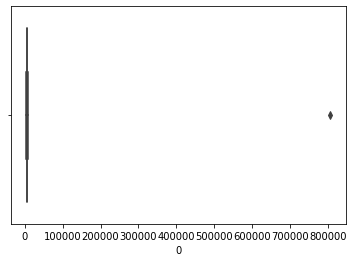

In [42]:
sns.boxplot(x=data[0])

In [43]:
df=data
q=df[0].quantile(0.99)
df[df[0]<q]
q_low=df[0].quantile(0.01)
q_hi=df[0].quantile(0.99)
df_filtered=df[(df[0]<q_hi)&(df[0]>q_low)]
df_filtered.head()

,0
0,5551.82208
1,4983.17184
2,4888.39680
3,5072.95872
4,5196.25980


In [44]:
print(len(data))
print(len(df_filtered))
if(len(data)==len(df_filtered)):
    print('No outliers')

2184
2140


**Normalisation:**

In [45]:
data=df_filtered
data_n=data.copy()
data_n=(data_n-data_n.min())/(data_n.max()-data_n.min())
data_n.head()

,0
0,0.372950
1,0.254941
2,0.235273
3,0.273574
4,0.299162



**Split Data:**

In [46]:
train_data,test_data=train_test_split(data_n,test_size=0.1)

In [47]:
print(len(train_data))
train_data.head()

1926


,0
424,0.935949
66,0.779381
190,0.257012
1579,0.196810
1634,0.548087


In [48]:
x=[]
y=[]
for i in range(len(train_data.iloc[:,0])-24):
    x.append(train_data.iloc[i,0])
    y.append(train_data.iloc[i+24,0])


**Train Data:**

In [49]:
m=1
c=-1
gama=0.9
l=0.1      #learning rate
epochs=100 #epochs
em=0
ec=0
e=10**(-8)
err=[]
for i in range(epochs):
  er=0
  for j in range(len(x)):
    er+=((y[j]-(m*x[j])-c))**2
    gm=-(y[j]-m*x[j]-c)*x[j]
    gc=-(y[j]-m*x[j]-c)
    em=(gama*em)+(1-gama)*(gm**2)
    ec=(gama*ec)+(1-gama)*(gc**2)
    d_m=-((l)/(em+e)**(0.5))*(gm)
    d_c=-((l)/(ec+e)**(0.5))*(gc)
    m=m+d_m
    c=c+d_c
    er=(1/(2*len(x)))*(er)
    err.append(er)
print("The minimum value obtained at m=%.2f"%(m),", c=%.2f"%(c))

The minimum value obtained at m=0.18 , c=0.44



**MSE,RMSE for Training data :** 

In [50]:
train_data_pred = [i for i in x]
for k in range(len(x)):
    train_data_pred[k]=(m*x[k] + c)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y,train_data_pred)
print("Mean Square Error for training data (MSE) : ",mse)
print("Root mean square error for training data (RMSE) : ",mse**0.5)

Mean Square Error for training data (MSE) :  0.04904429047025016
Root mean square error for training data (RMSE) :  0.22145945559006994


Text(0.5, 1.0, 'Predicted data vs Actual data')

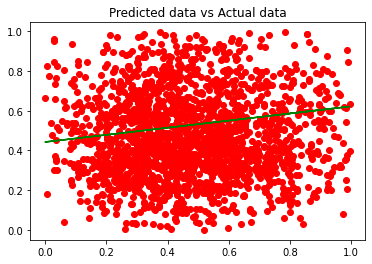

In [51]:
plt.plot(np.array(x),np.array(train_data_pred),'green')
plt.scatter(np.array(x),np.array(y),color='red')
plt.title('Predicted data vs Actual data')

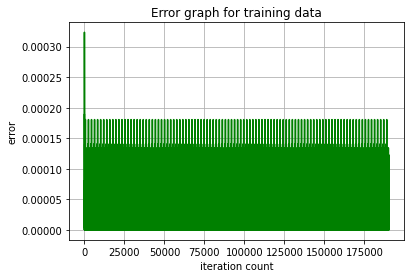

In [52]:
iters=np.arange(epochs*len(x))
plt.plot(iters,err,'green')
plt.title("Error graph for training data")
plt.xlabel("iteration count")
plt.ylabel("error")
plt.grid()


**Test Data:**

In [53]:
xx = []
yy = []
for i in range(len(test_data.iloc[:,0])-24):
    xx.append(test_data.iloc[i,0])
    yy.append(test_data.iloc[i+24,0])
test_data_pred = [i for i in xx]
for k in range(len(xx)):
    test_data_pred[k]=(m*xx[k] + c)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(yy,test_data_pred)
print("Mean Square Error for testing data (MSE) : ",mse)
print("Root Mean Square Error for testing data (RMSE) : ",mse**0.5)

Mean Square Error for testing data (MSE) :  0.04031196551583746
Root Mean Square Error for testing data (RMSE) :  0.20077839902698064


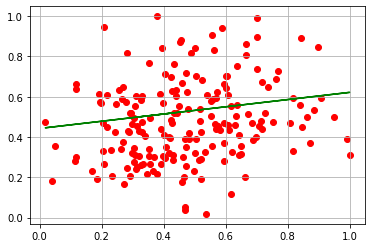

In [54]:
plt.scatter(xx,yy,color='red')
plt.plot(xx,test_data_pred,'green')
plt.grid()

**Predict the Output:**

In [55]:
x_max=y_max= 8841.669480
x_min=y_min= 3377.919600
x2= float(input("Enter load of previous hour : "))
xi=(x2-x_min)/(x_max-x_min)
yi=m*xi+c
yi=yi*(y_max-y_min)+y_min
print("Load at hour based on its previous hour {} is : {}".format(x2,yi))

Enter load of previous hour : 5138.896
Load at hour based on its previous hour 5138.896 is : 6111.711396078776
